In [1]:
!pip install geopandas
!pip install descartes
!pip install contextily

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 16.7 MB 43.9 MB/s 
     |████████████████████████████████| 6.3 MB 36.1 MB/s 
     |████████████████████████████████| 19.3 MB 67.0 MB/s 


In [2]:
# import necessary packages
import os
import geopandas as gpd
#import contextily as ctx # for basemaps
from geopandas import GeoSeries
import shapely
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString, box
from matplotlib import pyplot as plt
import fiona

In [3]:
!wget https://github.com/mggg-states/MN-shapefiles/archive/refs/heads/master.zip -O MN-shapefiles-master.zip
!unzip -o MN-shapefiles-master.zip
!ls MN-shapefiles-master

--2022-03-31 14:05:38--  https://github.com/mggg-states/MN-shapefiles/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/mggg-states/MN-shapefiles/zip/refs/heads/master [following]
--2022-03-31 14:05:38--  https://codeload.github.com/mggg-states/MN-shapefiles/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘MN-shapefiles-master.zip’

MN-shapefiles-maste     [         <=>        ]  61.43M  20.9MB/s    in 2.9s    

2022-03-31 14:05:41 (20.9 MB/s) - ‘MN-shapefiles-master.zip’ saved [64409648]

Archive:  MN-shapefiles-master.zip
6c3356ad5f2b88f2bf063dc95485f068a8e1070b
   creating: MN

In [4]:
%pushd  ./MN-shapefiles-master/
!pwd
!ls 
!unzip -o MN12.zip  -d MN12
!unzip -o MN12_18.zip  -d MN12_18
!unzip -o MN14.zip  -d MN14
!unzip -o MN16.zip  -d MN16

/content/MN-shapefiles-master
/content/MN-shapefiles-master
Archived  LICENSE.md  MN12_18.zip  MN12.zip  MN14.zip  MN16.zip  README.md
Archive:  MN12.zip
  inflating: MN12/mn_precincts12.cpg  
  inflating: MN12/mn_precincts12.dbf  
  inflating: MN12/mn_precincts12.prj  
  inflating: MN12/mn_precincts12.shp  
  inflating: MN12/__MACOSX/._mn_precincts12.shp  
  inflating: MN12/mn_precincts12.shx  
Archive:  MN12_18.zip
  inflating: MN12_18/mn_precincts12_18.cpg  
  inflating: MN12_18/mn_precincts12_18.dbf  
  inflating: MN12_18/mn_precincts12_18.prj  
  inflating: MN12_18/mn_precincts12_18.shp  
  inflating: MN12_18/__MACOSX/._mn_precincts12_18.shp  
  inflating: MN12_18/mn_precincts12_18.shx  
Archive:  MN14.zip
  inflating: MN14/mn_precincts14.cpg  
  inflating: MN14/mn_precincts14.dbf  
  inflating: MN14/mn_precincts14.prj  
  inflating: MN14/mn_precincts14.shp  
  inflating: MN14/__MACOSX/._mn_precincts14.shp  
  inflating: MN14/mn_precincts14.shx  
Archive:  MN16.zip
  inflating: MN

In [5]:
# path to shapefile
filepath = "./MN12_18/mn_precincts12_18.shp"

# Read file using gpd.read_file()
data = gpd.read_file(filepath)

In [6]:
data.head() #look at top entries - looks like a pandas dataframe

,VTDID,PCTNAME,PCTCODE,MCDNAME,MCDCODE,CTU_TYPE,COUNTYNAME,COUNTYFIPS,CONGDIST,MNSENDIST,...,SSEN12R,SSEN12D,SH12I,SH12R,SH12D,CA1YES12,CA1NO12,CA2YES12,CA2NO12,geometry
0,270010005,Aitkin,0005,Aitkin,004,city,Aitkin,001,8,10,...,446.0,474.0,0.0,444.0,494.0,546.0,411.0,474.0,481.0,"POLYGON ((445353.311 5151929.970, 445349.129 5..."
1,270010010,Aitkin Twp,0010,Aitkin Twp,005,township,Aitkin,001,8,10,...,296.0,201.0,0.0,308.0,198.0,357.0,152.0,298.0,208.0,"MULTIPOLYGON (((445353.311 5151929.970, 445176..."
2,270010015,Ball Bluff Twp,0015,Ball Bluff Twp,015,township,Aitkin,001,8,10,...,71.0,96.0,0.0,66.0,103.0,113.0,62.0,81.0,95.0,"POLYGON ((485475.521 5207980.031, 485475.766 5..."
3,270010020,Balsam Twp,0020,Balsam Twp,020,township,Aitkin,001,8,10,...,11.0,10.0,0.0,10.0,12.0,11.0,12.0,10.0,13.0,"POLYGON ((495441.473 5188825.678, 495423.020 5..."
4,270010025,Beaver Twp,0025,Beaver Twp,025,township,Aitkin,001,8,10,...,8.0,34.0,0.0,8.0,35.0,16.0,27.0,17.0,26.0,"POLYGON ((495765.091 5140614.891, 494153.670 5..."


In [7]:
data.columns

Index(['VTDID', 'PCTNAME', 'PCTCODE', 'MCDNAME', 'MCDCODE', 'CTU_TYPE',
       'COUNTYNAME', 'COUNTYFIPS', 'CONGDIST', 'MNSENDIST',
       ...
       'SSEN12R', 'SSEN12D', 'SH12I', 'SH12R', 'SH12D', 'CA1YES12', 'CA1NO12',
       'CA2YES12', 'CA2NO12', 'geometry'],
      dtype='object', length=126)

In [8]:
# Note the column 'geometry' is full of shapely Polygon objects
type(data['geometry'].iloc[0])

shapely.geometry.polygon.Polygon

In [9]:
data['geometry']

0       POLYGON ((445353.311 5151929.970, 445349.129 5...
1       MULTIPOLYGON (((445353.311 5151929.970, 445176...
2       POLYGON ((485475.521 5207980.031, 485475.766 5...
3       POLYGON ((495441.473 5188825.678, 495423.020 5...
4       POLYGON ((495765.091 5140614.891, 494153.670 5...
                              ...                        
4108    POLYGON ((274346.360 4955571.000, 274281.941 4...
4109    POLYGON ((274700.871 4965291.671, 274662.821 4...
4110    POLYGON ((254960.691 4956237.880, 254908.720 4...
4111    POLYGON ((299520.061 4946945.070, 299562.541 4...
4112    POLYGON ((303361.641 4954448.269, 303312.521 4...
Name: geometry, Length: 4113, dtype: geometry

In [10]:
# geopandas adds useful attributes to the geodataframe, such as the ability to get bounds
# of all the geometry data
data.bounds

,minx,miny,maxx,maxy
0,443678.1504,5.150713e+06,448233.9790,5.154976e+06
1,437682.7156,5.150284e+06,447394.5712,5.160472e+06
2,475931.9907,5.198408e+06,485525.8802,5.208366e+06
3,485385.7192,5.179171e+06,495441.4726,5.188879e+06
4,486268.8196,5.140615e+06,495771.3392,5.150327e+06
...,...,...,...,...
4108,264295.0997,4.945881e+06,274346.3599,4.955884e+06
4109,264672.9502,4.955571e+06,274700.8711,4.965599e+06
4110,244946.5612,4.946561e+06,254960.6910,4.956703e+06
4111,298301.7710,4.946516e+06,299562.5405,4.948175e+06


In [11]:
# similary, we can get attributes such as boundary
data.boundary

0       MULTILINESTRING ((445353.311 5151929.970, 4453...
1       MULTILINESTRING ((445353.311 5151929.970, 4451...
2       LINESTRING (485475.521 5207980.031, 485475.766...
3       LINESTRING (495441.473 5188825.678, 495423.020...
4       LINESTRING (495765.091 5140614.891, 494153.670...
                              ...                        
4108    LINESTRING (274346.360 4955571.000, 274281.941...
4109    LINESTRING (274700.871 4965291.671, 274662.821...
4110    LINESTRING (254960.691 4956237.880, 254908.720...
4111    LINESTRING (299520.061 4946945.070, 299562.541...
4112    MULTILINESTRING ((303361.641 4954448.269, 3033...
Length: 4113, dtype: geometry

In [12]:
# area will warn you if you're trying to do area calculations in geographic CRS
data.area

0       6.629747e+06
1       8.780913e+07
2       9.148057e+07
3       9.517941e+07
4       9.135949e+07
            ...     
4108    9.382148e+07
4109    9.400620e+07
4110    8.843687e+07
4111    1.955004e+06
4112    9.138389e+07
Length: 4113, dtype: float64

In [13]:
# The CRS used by most web maps, such as Google maps, OSM, Bing, etc.
# Not accurate at high latitudes >85 degrees, <-85 degrees
# units: meters
# 0,0 is intersection of greensich meridian and equator
# epsg code: 3857
# data_in_3857 = data.to_crs('epsg:3857')
# data_in_3857.area

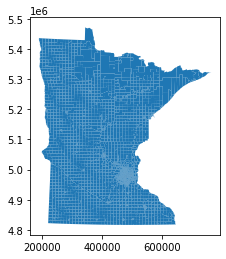

In [14]:
data.plot()

In [15]:
# Make a selection that contains only the first five rows
selection = data[0:5]

# Iterate over rows and print the area of a Polygon
for index, row in selection.iterrows():
    # Get the area of the polygon
    poly_area = row['geometry'].area / 10**6
    # Print information for the user
    print("Polygon area at index {} is: {:.1f} km^2".format(index, poly_area))

Polygon area at index 0 is: 6.6 km^2
Polygon area at index 1 is: 87.8 km^2
Polygon area at index 2 is: 91.5 km^2
Polygon area at index 3 is: 95.2 km^2
Polygon area at index 4 is: 91.4 km^2


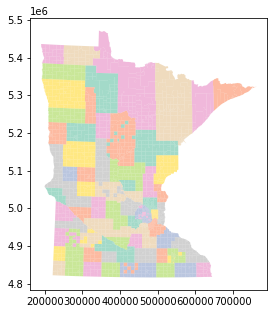

In [16]:
# we can use the built-in geopandas plot function to visualize
ax = data.plot(figsize = (10,5), alpha = 0.6, cmap = 'Set2')

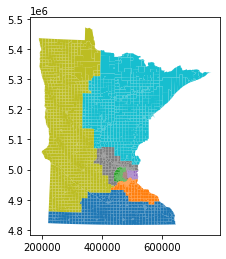

In [17]:
data.plot(column = 'CONGDIST')

In [20]:
print(data['CONGDIST'].unique())

['8' '6' '5' '3' '7' '1' '2' '4']


In [21]:
dt_1 = data[data['CONGDIST'] == '1']['geometry']

p_1 = shapely.ops.unary_union(dt_1).length / 1000
print("District 1 perimeter is: {:.1f} km".format(p_1))
a_1 = shapely.ops.unary_union(dt_1).area / 10**6
print("District 1 area is: {:.1f} km^2".format(a_1))
c_1 = shapely.ops.unary_union(dt_1).convex_hull.area / 10**6
print("District 1 convex hull area is: {:.1f} km^2".format(c_1))

District 1 perimeter is: 1108.1 km
District 1 area is: 31538.8 km^2
District 1 convex hull area is: 38027.4 km^2


In [22]:
dt_2 = data[data['CONGDIST'] == '2']['geometry']

p_2 = shapely.ops.unary_union(dt_2).length / 1000
print("District 2 perimeter is: {:.1f} km".format(p_2))
a_2 = shapely.ops.unary_union(dt_2).area / 10**6
print("District 2 area is: {:.1f} km^2".format(a_2))
c_2 = shapely.ops.unary_union(dt_2).convex_hull.area / 10**6
print("District 2 convex hull area is: {:.1f} km^2".format(c_2))

District 2 perimeter is: 505.2 km
District 2 area is: 6552.2 km^2
District 2 convex hull area is: 8811.9 km^2


In [23]:
dt_3 = data[data['CONGDIST'] == '3']['geometry']

p_3 = shapely.ops.unary_union(dt_3).length / 1000
print("District 3 perimeter is: {:.1f} km".format(p_3))
a_3 = shapely.ops.unary_union(dt_3).area / 10**6
print("District 3 area is: {:.1f} km^2".format(a_3))
c_3 = shapely.ops.unary_union(dt_3).convex_hull.area / 10**6
print("District 3 convex hull are is: {:.1f} km^2".format(c_3))

District 3 perimeter is: 262.2 km
District 3 area is: 1509.5 km^2
District 3 convex hull are is: 1982.1 km^2


In [24]:
dt_4 = data[data['CONGDIST'] == '4']['geometry']

p_4 = shapely.ops.unary_union(dt_4).length / 1000
print("District 4 perimeter is: {:.1f} km".format(p_4))
a_4 = shapely.ops.unary_union(dt_4).area / 10**6
print("District 4 area is: {:.1f} km^2".format(a_4))
c_4 = shapely.ops.unary_union(dt_4).convex_hull.area / 10**6
print("District 4 convex hull are is: {:.1f} km^2".format(c_4))

District 4 perimeter is: 144.7 km
District 4 area is: 944.5 km^2
District 4 convex hull are is: 1075.5 km^2


In [25]:
dt_5 = data[data['CONGDIST'] == '5']['geometry']

p_5 = shapely.ops.unary_union(dt_5).length / 1000
print("District 5 perimeter is: {:.1f} km".format(p_5))
a_5 = shapely.ops.unary_union(dt_5).area / 10**6
print("District 5 area is: {:.1f} km^2".format(a_5))
c_5 = shapely.ops.unary_union(dt_5).convex_hull.area / 10**6
print("District 5 convex hull are is: {:.1f} km^2".format(c_5))

District 5 perimeter is: 113.1 km
District 5 area is: 367.8 km^2
District 5 convex hull are is: 444.1 km^2


In [26]:
dt_6 = data[data['CONGDIST'] == '6']['geometry']

p_6 = shapely.ops.unary_union(dt_6).length / 1000
print("District 6 perimeter is: {:.1f} km".format(p_6))
a_6 = shapely.ops.unary_union(dt_6).area / 10**6
print("District 6 area is: {:.1f} km^2".format(a_6))
c_6 = shapely.ops.unary_union(dt_6).convex_hull.area / 10**6
print("District 6 convex hull area is: {:.1f} km^2".format(c_6))

District 6 perimeter is: 661.6 km
District 6 area is: 7864.8 km^2
District 6 convex hull area is: 12627.9 km^2


In [27]:
dt_7 = data[data['CONGDIST'] == '7']['geometry']

p_7 = shapely.ops.unary_union(dt_7).length / 1000
print("District 7 perimeter is: {:.1f} km".format(p_7))
a_7 = shapely.ops.unary_union(dt_7).area / 10**6
print("District 7 area is: {:.1f} km^2".format(a_7))
c_7 = shapely.ops.unary_union(dt_7).convex_hull.area / 10**6
print("District 7 convex hull area is: {:.1f} km^2".format(c_7))

District 7 perimeter is: 2288.3 km
District 7 area is: 91651.9 km^2
District 7 convex hull area is: 125821.2 km^2


In [28]:
dt_8 = data[data['CONGDIST'] == '8']['geometry']

p_8 = shapely.ops.unary_union(dt_8).length / 1000
print("District 8 perimeter is: {:.1f} km".format(p_8))
a_8 = shapely.ops.unary_union(dt_8).area / 10**6
print("District 8 area is: {:.1f} km^2".format(a_8))
c_8 = shapely.ops.unary_union(dt_8).convex_hull.area / 10**6
print("District 8 convex hull area is: {:.1f} km^2".format(c_8))

District 8 perimeter is: 1804.6 km
District 8 area is: 78075.5 km^2
District 8 convex hull area is: 103292.0 km^2
